# 任务描述：
Kaggle共享单车项目：   
根据城市共享单车公共数据集中租车日期，租车季节，租车气温，租车空气湿度等数据。对数据进行清洗，计算描述性统计数据，并实现数据的基本可视化功能。
1. 数据清洗   
数据清洗属于数据预处理的一步。数据预处理的主要内容包括数据清洗、数据集成、数据变换。   

数据清洗可能要做的事：
+ 调整数据类型
+ 修改列名
+ 选择部分子集：可能有部分列在数据分析中不需要用到
+ 可能存在逻辑问题需要筛选
+ 格式一致化
+ 消灭空值
2. 计算描述性统计数据   
    ——>EDA
3. 数据基本可视化


In [1]:
# 数据处理
import pandas as pd
import numpy as np

# 画图
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# 一、数据加载

In [2]:
df_train = pd.read_csv('./Data/train.csv')
df_test = pd.read_csv('./Data/test.csv')

In [3]:
from sklearn.model_selection import train_test_split
X=df_train.drop('count',axis=1)
y=df_train['count']
X_Train,X_Validate,y_Train,y_Validate=train_test_split(X,y,test_size=0.2,random_state=0)
df_train=pd.concat([X_Train,y_Train],axis=1)
df_validate=pd.concat([X_Validate,y_Validate],axis=1)

In [4]:
df_test.shape

(6493, 9)

In [5]:
df_train.shape

(8708, 12)

In [6]:
df_validate.shape

(2178, 12)

# 二、数据预处理
Exploratory Data Analysis(EDA)

## 2.1：整体

In [7]:
df_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
3662,2011-09-03 12:00:00,3,0,0,1,28.70,32.575,61,15.0013,97,160,257
8648,2012-08-02 17:00:00,3,0,1,1,33.62,38.635,52,16.9979,90,775,865
7053,2012-04-12 06:00:00,2,0,1,1,12.30,14.395,65,16.9979,2,94,96
2685,2011-06-19 19:00:00,2,0,0,1,29.52,34.090,62,8.9981,94,217,311
5927,2012-02-03 04:00:00,1,0,1,1,10.66,12.880,60,15.0013,0,2,2


In [8]:
df_train.sort_index(inplace=True)

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8708 entries, 0 to 10884
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    8708 non-null   object 
 1   season      8708 non-null   int64  
 2   holiday     8708 non-null   int64  
 3   workingday  8708 non-null   int64  
 4   weather     8708 non-null   int64  
 5   temp        8708 non-null   float64
 6   atemp       8708 non-null   float64
 7   humidity    8708 non-null   int64  
 8   windspeed   8708 non-null   float64
 9   casual      8708 non-null   int64  
 10  registered  8708 non-null   int64  
 11  count       8708 non-null   int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 884.4+ KB


In [10]:
df_train.nunique()

datetime      8708
season           4
holiday          2
workingday       2
weather          4
temp            49
atemp           58
humidity        88
windspeed       28
casual         295
registered     703
count          792
dtype: int64

In [11]:
# 检查缺失数据
df_train.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [12]:
df_train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000
mean,2.496899,0.029513,0.679835,1.413413,20.151585,23.566106,61.778824,12.848368,35.888723,154.966812,190.855535
std,1.118607,0.169249,0.466567,0.628714,7.772519,8.461146,19.201010,8.242156,49.837535,150.871639,180.852259
min,1.000000,0.000000,0.000000,1.000000,0.820000,2.275000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,0.000000,1.000000,13.940000,16.665000,46.750000,7.001500,4.000000,36.000000,43.000000
50%,2.000000,0.000000,1.000000,1.000000,20.500000,24.240000,62.000000,12.998000,16.000000,117.000000,143.000000
75%,4.000000,0.000000,1.000000,2.000000,26.240000,31.060000,77.000000,16.997900,48.000000,222.000000,285.000000
max,4.000000,1.000000,1.000000,4.000000,41.000000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


## 2.2：各维度

### 2.2.1：count
先用箱形图查看数据分布，发现有很多异常值，丢弃离群值，再次查看处理后的数据的箱形图，异常值减少。   

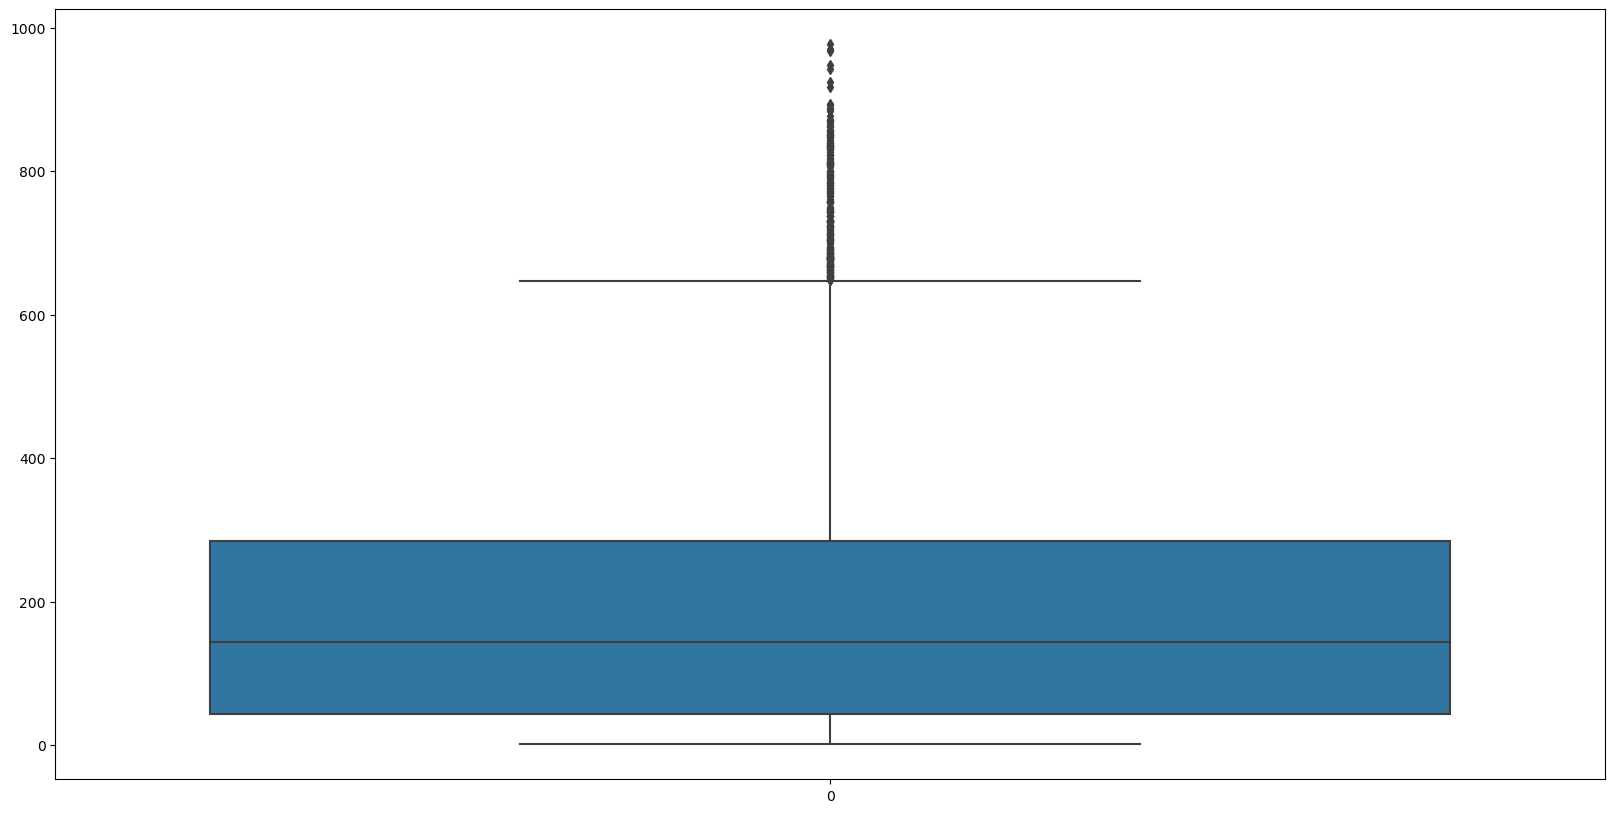

In [13]:
fig=plt.figure(figsize=(20,10))
sns.boxplot(df_train['count'])

plt.show()

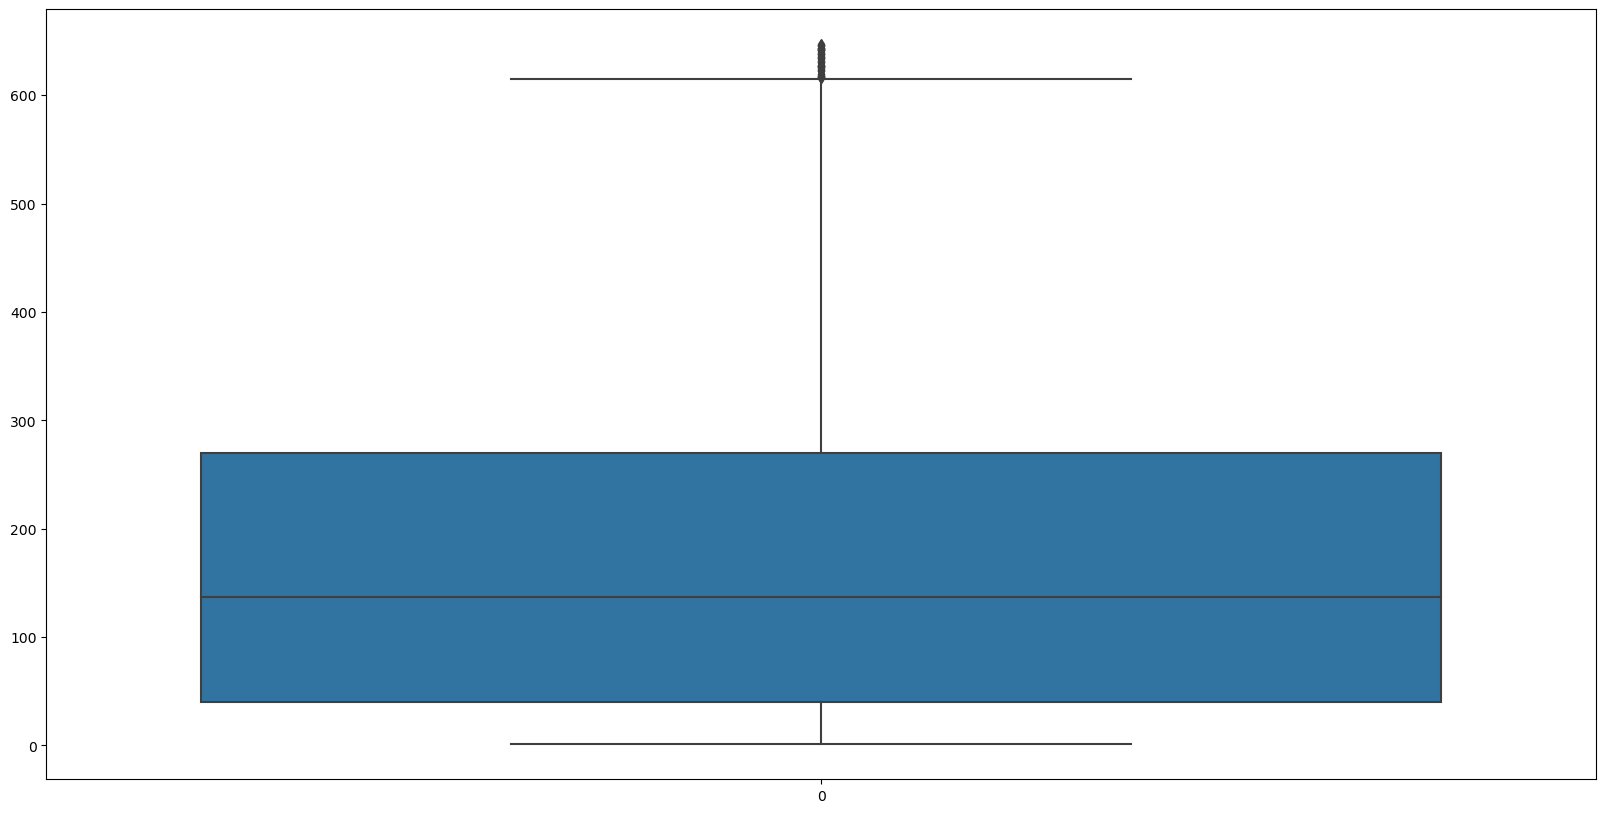

In [14]:
# 抛弃离群值
def drop_outliers(df, target):
    q1 = df[target].quantile(0.25)
    q3 = df[target].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df_filtered = df[(df[target] >= lower_bound) & (df[target] <= upper_bound)]
    return df_filtered

df_train = drop_outliers(df_train, 'count')

fig = plt.figure(figsize=(20, 10))
sns.boxplot(df_train['count'])
plt.show();

In [15]:
df_train.shape  # 8708->8401

(8466, 12)

查看数据分布，发现其分布不符合正态分布，进行对数变换，使之满足正态分布。

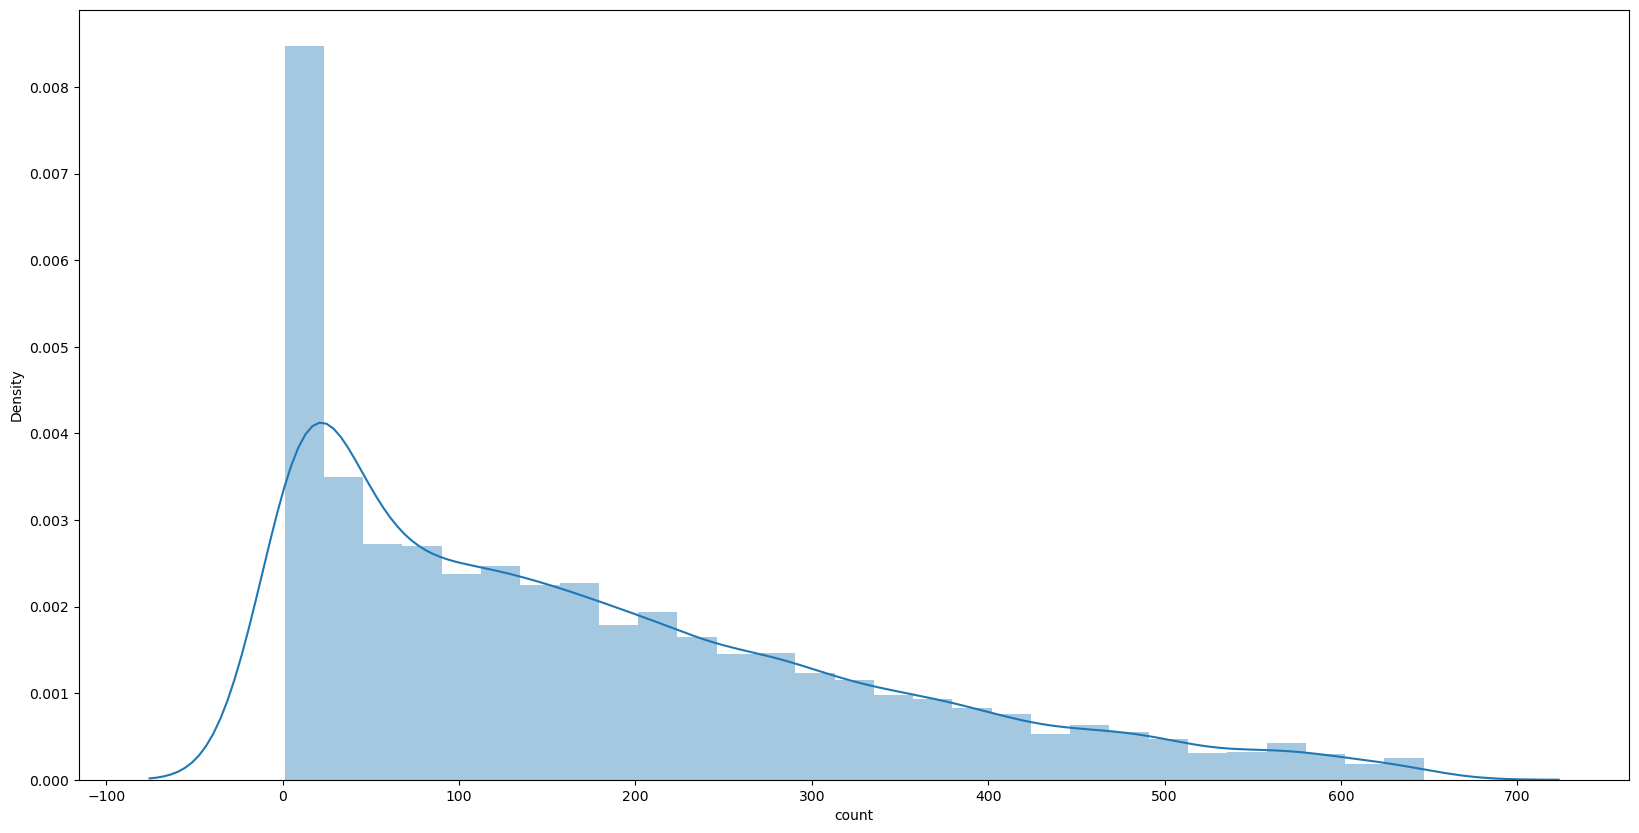

In [16]:
# 查看分布
fig = plt.figure(figsize=(20, 10))
sns.distplot(df_train['count'])

plt.show();

In [17]:
# 对数变换
df_train['log_count']=np.log(df_train['count'])

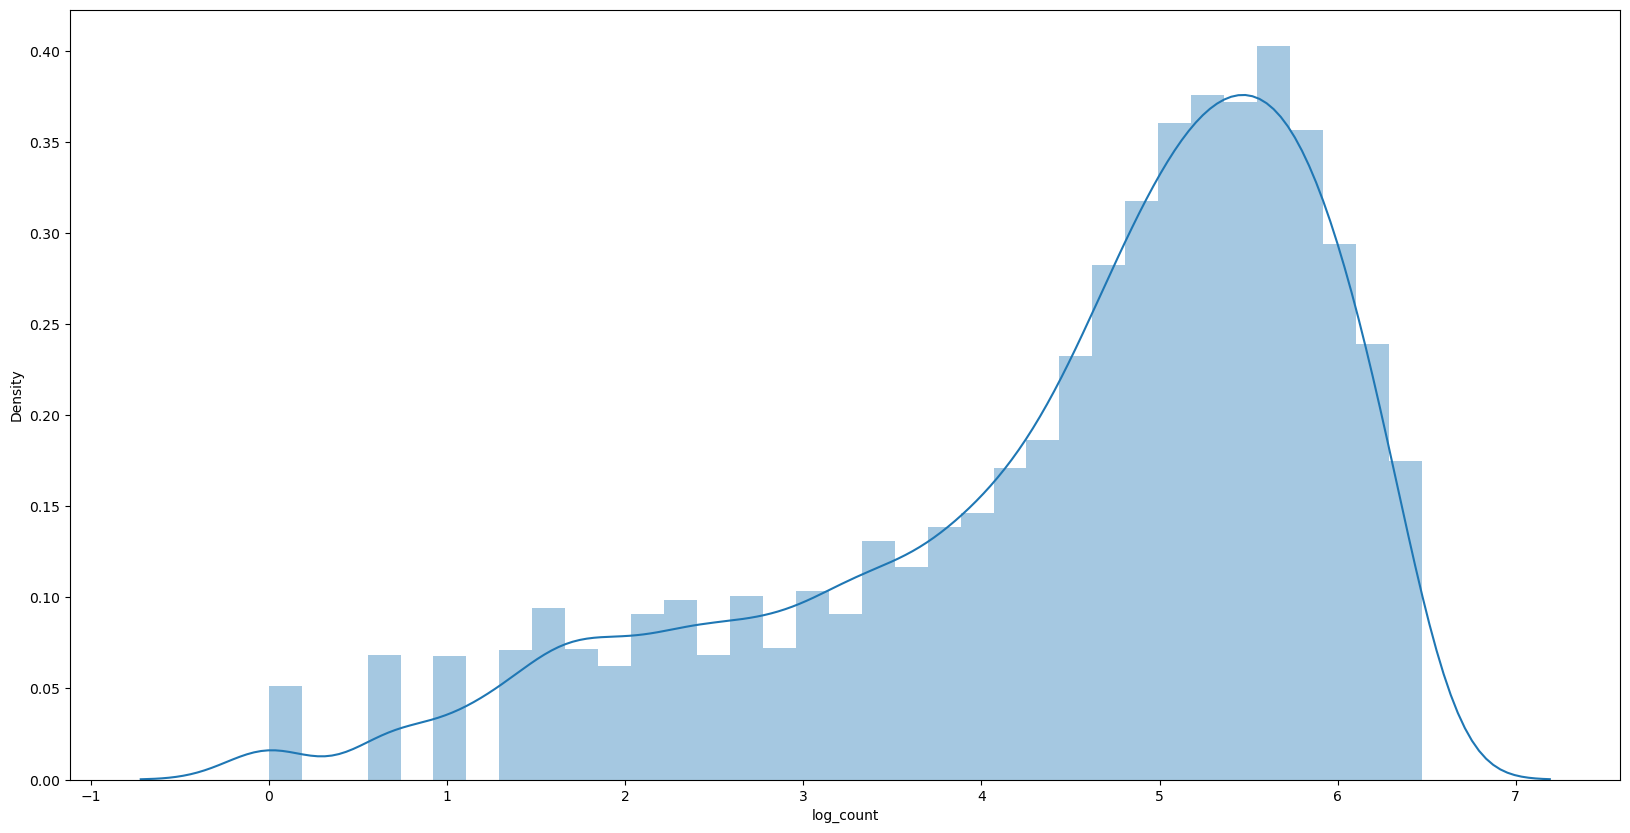

In [18]:
fig = plt.figure(figsize=(20, 10))
sns.distplot(df_train['log_count'])

plt.show();

### 2.2.2：datetime
拆分成Year、Month、Weekday、Hour。

In [19]:
df_train['datetime']=pd.to_datetime(df_train['datetime'])
df_train['Year']=df_train['datetime'].dt.year
df_train['Month']=df_train['datetime'].dt.month
df_train['Weekday']=df_train['datetime'].dt.weekday
df_train['Hour']=df_train['datetime'].dt.hour
df_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,log_count,Year,Month,Weekday,Hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2.772589,2011,1,5,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,3.688879,2011,1,5,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,3.465736,2011,1,5,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2.564949,2011,1,5,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,0.000000,2011,1,5,4


#### Hour

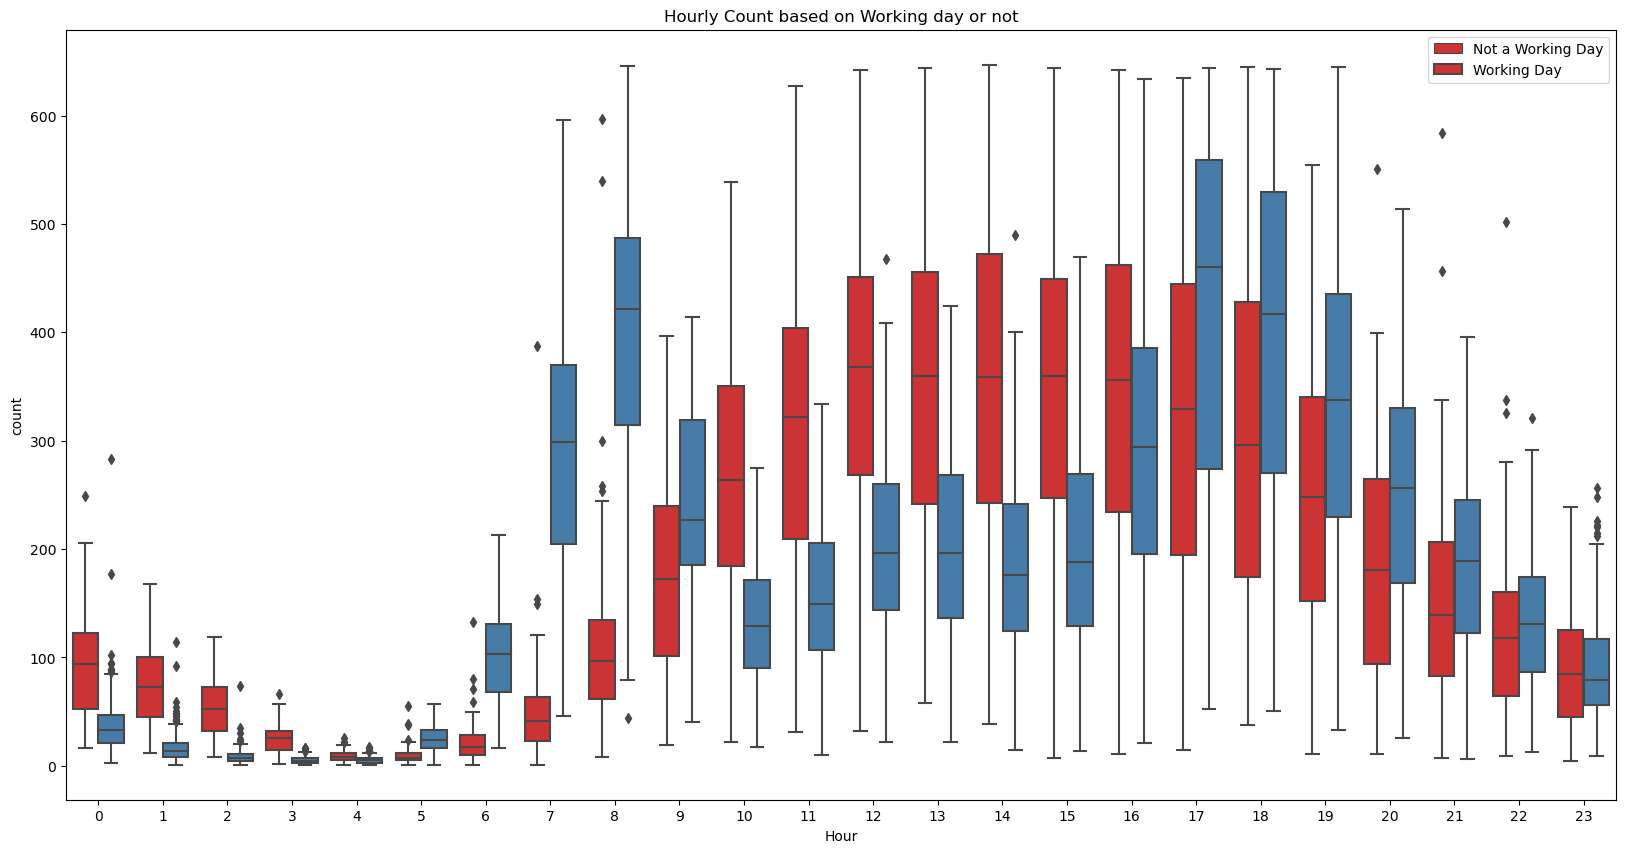

In [20]:
f,axes=plt.subplots(1,1,figsize=(20,10))
sns.boxplot(data=df_train,y='count',x='Hour',hue='workingday',ax=axes,palette='Set1')
handles,_=axes.get_legend_handles_labels()
axes.legend(handles,labels=['Not a Working Day','Working Day'])
axes.set(title='Hourly Count based on Working day or not')

plt.show()

白天共享单车需求量明显高于夜晚；在工作日，共享单车需求量在上下班时达到高峰，而其他时间较少；在非工作日，共享单车需求量在中午和下午较高。

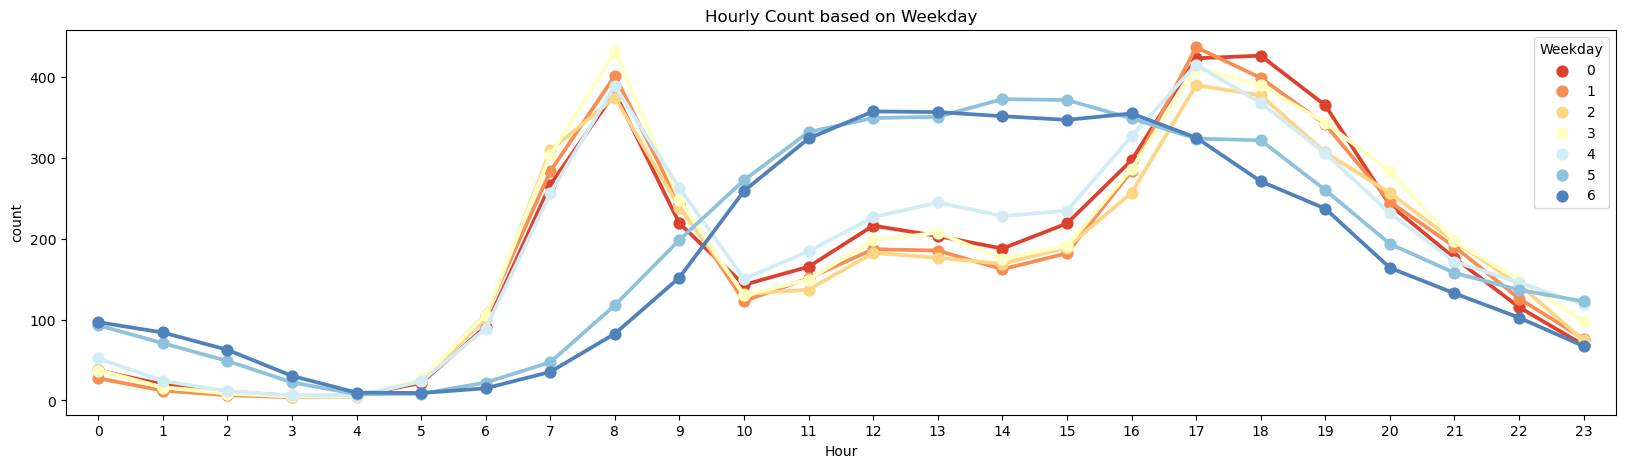

In [21]:
f, axes = plt.subplots(1,1, figsize=(20,5))
agg_weekday_hour = pd.DataFrame(df_train.groupby(['Weekday', 'Hour'])['count'].mean().reset_index())
sns.pointplot(data=agg_weekday_hour, x='Hour', y='count', hue='Weekday', ax=axes, palette='RdYlBu')
axes.set(title='Hourly Count based on Weekday')

plt.show()

#### Weekday

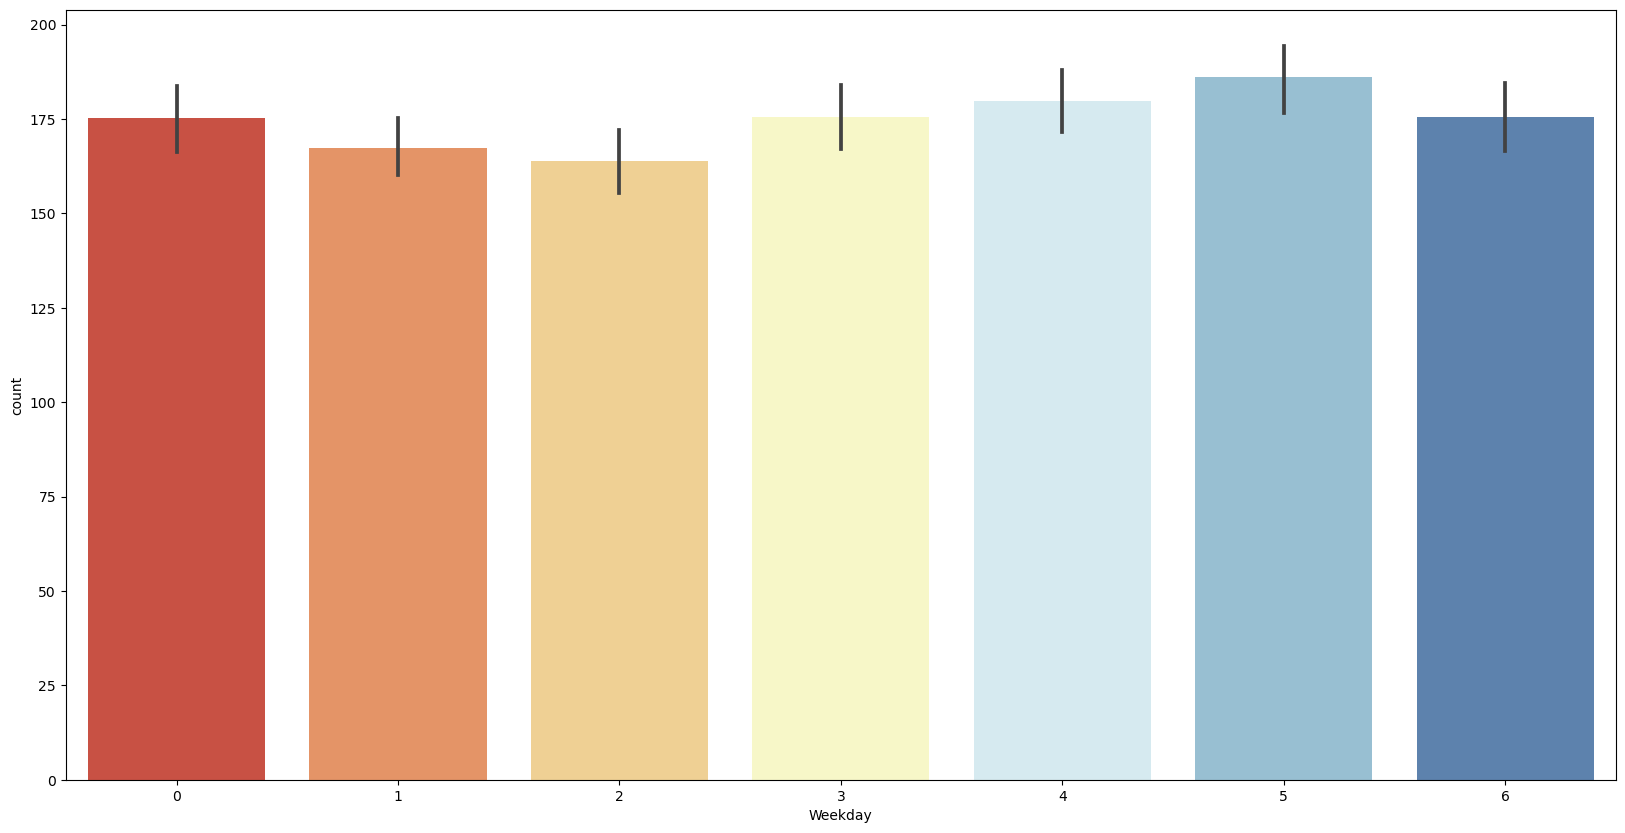

In [22]:
fig=plt.figure(figsize=(20,10))
sns.barplot(data=df_train,x='Weekday',y='count',palette='RdYlBu')
plt.show()

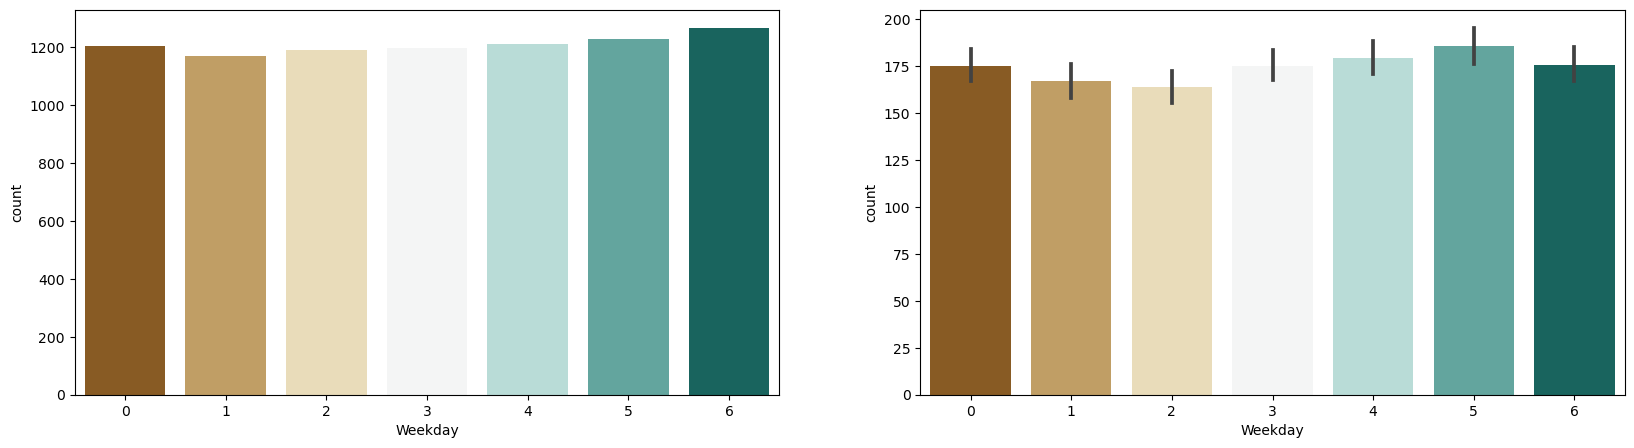

In [23]:
f,axes=plt.subplots(1,2,figsize=(20,5))
sns.countplot(data=df_train,x='Weekday',ax=axes[0],palette='BrBG')
sns.barplot(data=df_train,x='Weekday',y='count',ax=axes[1],palette='BrBG')

plt.show()

#### Month

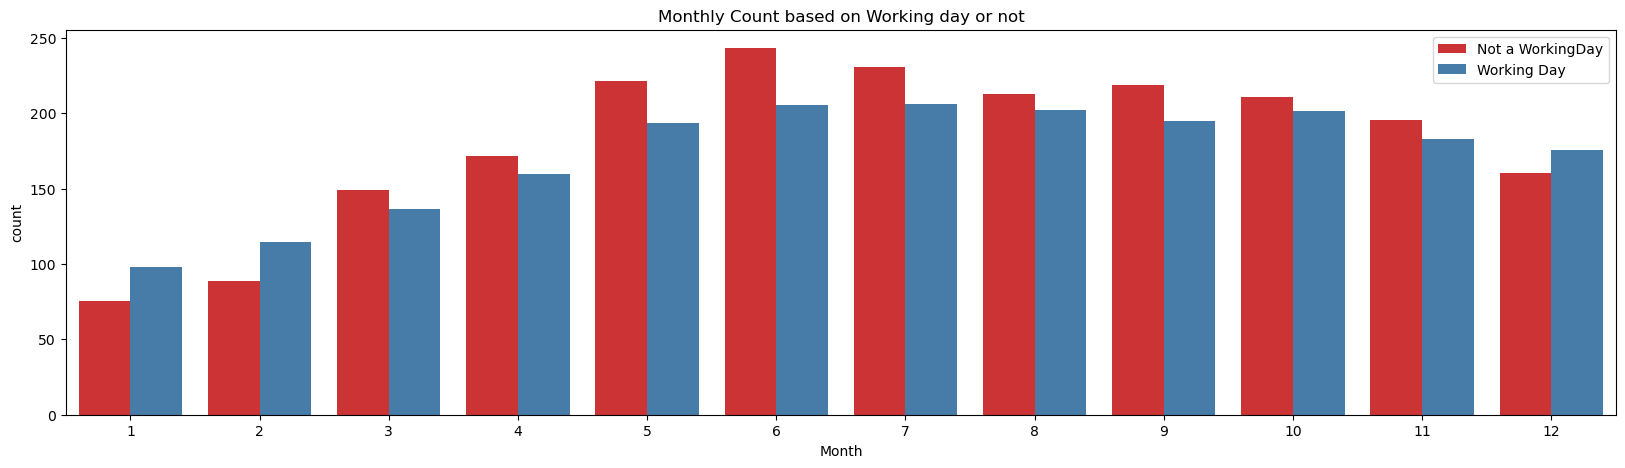

In [24]:
f,axes=plt.subplots(1,1,figsize=(20,5))
agg_month=pd.DataFrame(df_train.groupby(['Month','workingday']).mean().reset_index())
sns.barplot(data=agg_month,x='Month',y='count',hue='workingday',ax=axes,palette='Set1')
handles,_=axes.get_legend_handles_labels()
axes.legend(handles,['Not a WorkingDay','Working Day'])
axes.set(title='Monthly Count based on Working day or not')

plt.show()

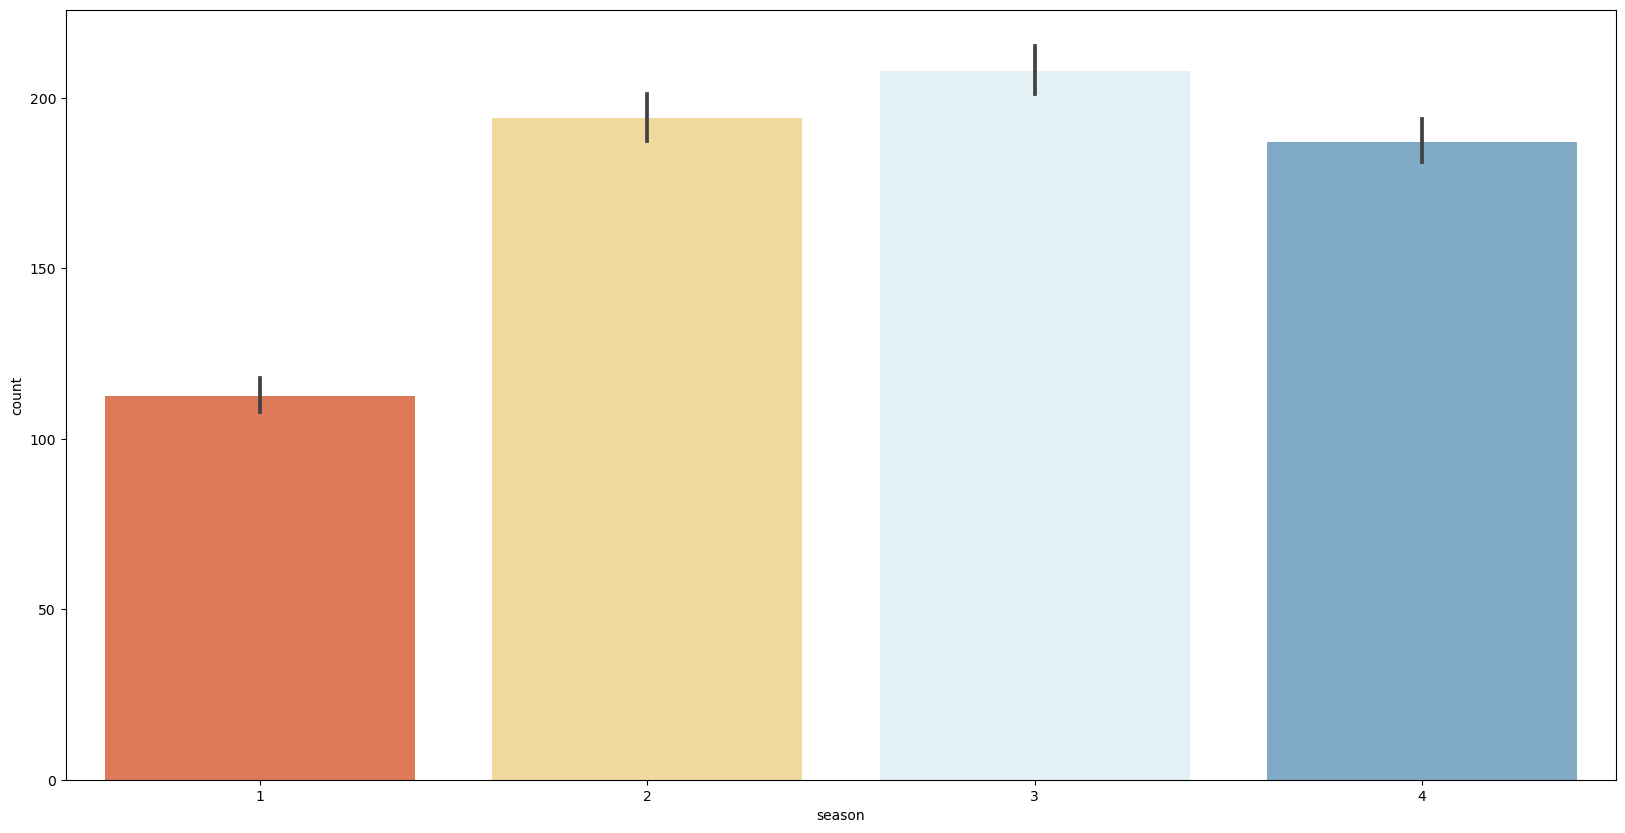

In [25]:
fig=plt.figure(figsize=(20,10))
sns.barplot(data=df_train,x='season',y='count',palette='RdYlBu')
plt.show()

在夏季和秋季共享单车需求量较大，从月份中也可以看出，包含了season的信息，因此season列可以drop

#### Year

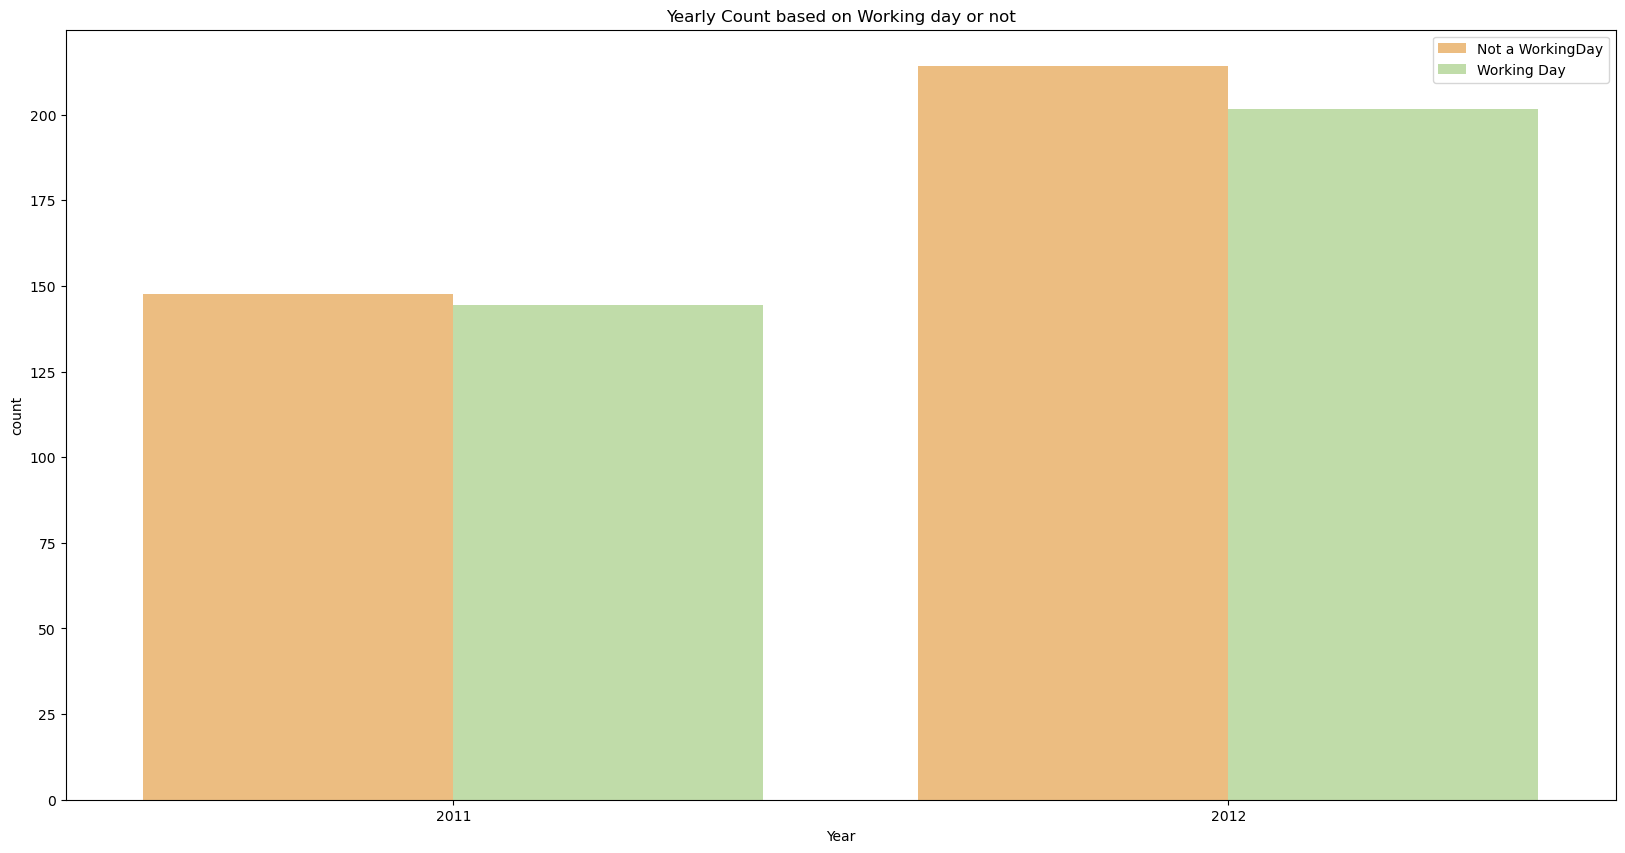

In [26]:
f,axes=plt.subplots(1,1,figsize=(20,10))
agg_month=pd.DataFrame(df_train.groupby(['Year','workingday']).mean().reset_index())
sns.barplot(data=agg_month,x='Year',y='count',hue='workingday',ax=axes,palette='Spectral')
handles,_=axes.get_legend_handles_labels()
axes.legend(handles,['Not a WorkingDay','Working Day'])
axes.set(title='Yearly Count based on Working day or not')

plt.show()

第二年共享单车需求量明显比上一年大

#### Periodic Features
其中月、周、时具有周期性特征，如月份1与12数字上相差很大而实际很接近。

常见有两种周期性特征：   
1. 周期性指示器：适合于观测较少的情况，比如每周观测一次的周期；
2. 傅里叶特征：适合于存在许多观测的周期，比如每年每日观测周期；

此处由于采样较多，选用傅里叶特征，即一对正弦和余弦曲线，捕捉该周期性信息   
于是转换成sin、cos替代

In [27]:
def periodic_transform(df, variable):
    df[f"{variable}_sin"] = np.sin(df[variable] / df[variable].max() * 2 * np.pi)
    df[f"{variable}_cos"] = np.cos(df[variable] / df[variable].max() * 2 * np.pi)
    return df

In [28]:
df_train=periodic_transform(df_train, 'Month')
df_train=periodic_transform(df_train, 'Weekday')
df_train=periodic_transform(df_train, 'Hour')

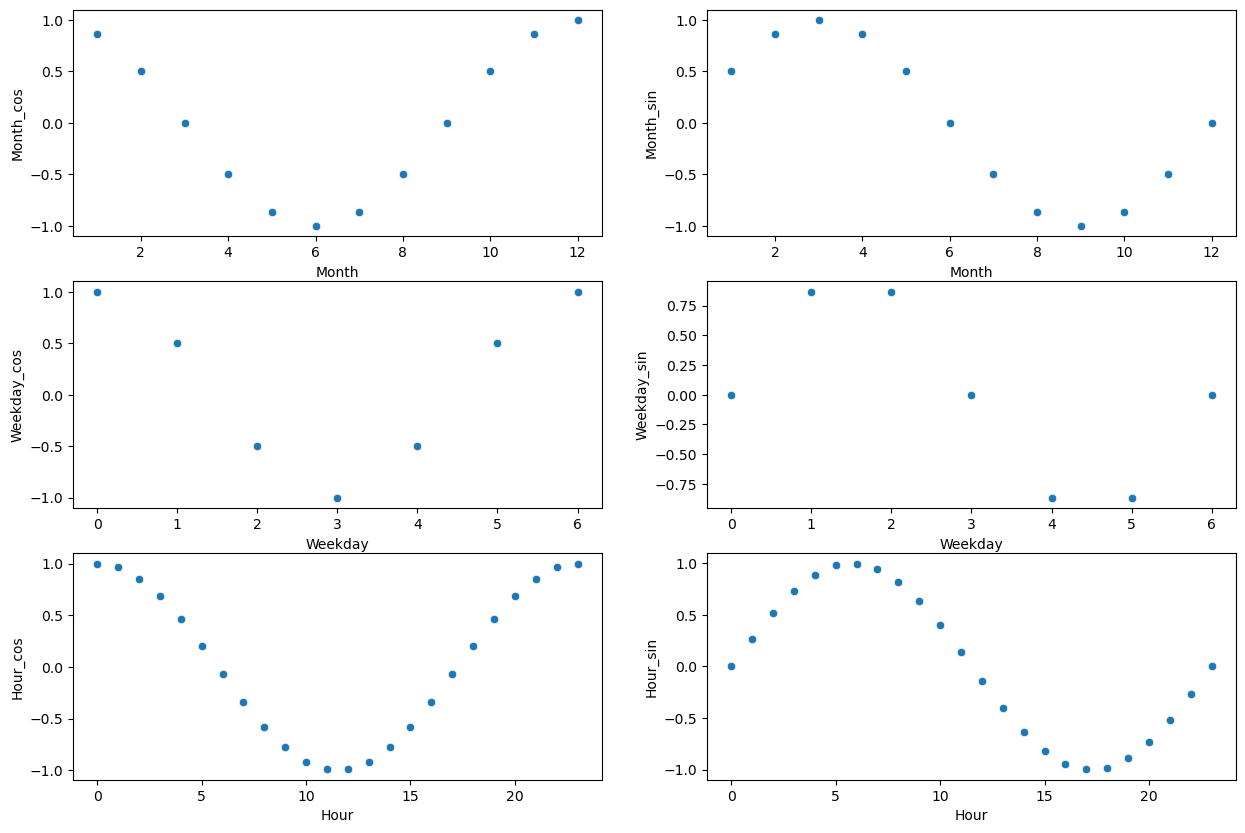

In [29]:
f,axes=plt.subplots(3,2,figsize=(15,10))
sns.scatterplot(data=df_train,x='Month',y='Month_cos',ax=axes[0][0])
sns.scatterplot(data=df_train,x='Month',y='Month_sin',ax=axes[0][1])
sns.scatterplot(data=df_train,x='Weekday',y='Weekday_cos',ax=axes[1][0])
sns.scatterplot(data=df_train,x='Weekday',y='Weekday_sin',ax=axes[1][1])
sns.scatterplot(data=df_train,x='Hour',y='Hour_cos',ax=axes[2][0])
sns.scatterplot(data=df_train,x='Hour',y='Hour_sin',ax=axes[2][1])
plt.show()

### 2.2.3 weather
作weather和count数据的箱形图，发现Heavy Snow/Rain只有一条数据，查看具体情况，发现当时为下班时间，前后天气为Light Snow/Rain，天气影响并非主要因素，因此不妨将其归入Light Snow/Rain

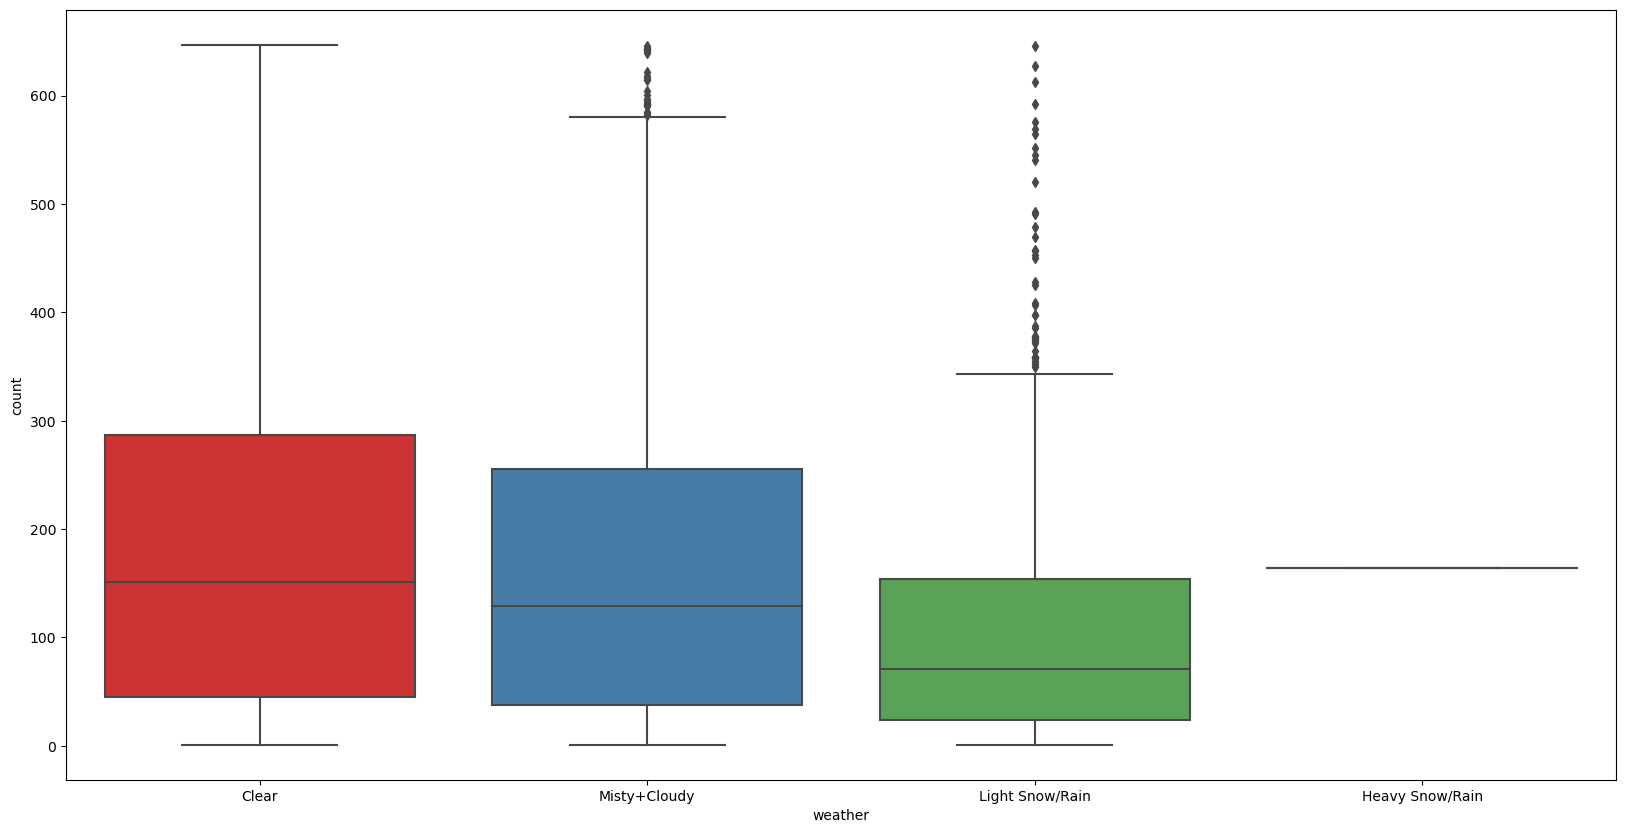

In [30]:
f, axes = plt.subplots(1,1,figsize=(20,10))
sns.boxplot(df_train,x='weather',y='count',ax=axes,palette='Set1')
axes.set_xticklabels(['Clear','Misty+Cloudy','Light Snow/Rain','Heavy Snow/Rain'])
plt.show()

In [31]:
df_train['weather'].value_counts()

weather
1    5583
2    2227
3     655
4       1
Name: count, dtype: int64

In [32]:
df_train[df_train['weather']==4]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,Year,Month,Weekday,Hour,Month_sin,Month_cos,Weekday_sin,Weekday_cos,Hour_sin,Hour_cos
5631,2012-01-09 18:00:00,1,0,1,4,8.2,11.365,86,6.0032,6,...,2012,1,0,18,0.5,0.866025,0.0,1.0,-0.979084,0.203456


In [33]:
df_train[(df_train['datetime'] > '2012-01-09 08:00') & (df_train['datetime'] < '2012-01-09 22:00')]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,Year,Month,Weekday,Hour,Month_sin,Month_cos,Weekday_sin,Weekday_cos,Hour_sin,Hour_cos
5622,2012-01-09 09:00:00,1,0,1,2,9.02,13.635,64,0.0000,9,...,2012,1,0,9,0.5,0.866025,0.0,1.0,0.631088,-0.775711
5623,2012-01-09 10:00:00,1,0,1,1,9.84,14.395,60,0.0000,13,...,2012,1,0,10,0.5,0.866025,0.0,1.0,0.398401,-0.917211
5624,2012-01-09 11:00:00,1,0,1,2,10.66,14.395,56,6.0032,6,...,2012,1,0,11,0.5,0.866025,0.0,1.0,0.136167,-0.990686
5626,2012-01-09 13:00:00,1,0,1,2,10.66,13.635,56,7.0015,3,...,2012,1,0,13,0.5,0.866025,0.0,1.0,-0.398401,-0.917211
5627,2012-01-09 14:00:00,1,0,1,3,9.02,11.365,75,11.0014,5,...,2012,1,0,14,0.5,0.866025,0.0,1.0,-0.631088,-0.775711
5628,2012-01-09 15:00:00,1,0,1,3,9.02,11.365,75,11.0014,5,...,2012,1,0,15,0.5,0.866025,0.0,1.0,-0.816970,-0.576680
5630,2012-01-09 17:00:00,1,0,1,3,9.02,13.635,87,0.0000,5,...,2012,1,0,17,0.5,0.866025,0.0,1.0,-0.997669,-0.068242
5631,2012-01-09 18:00:00,1,0,1,4,8.20,11.365,86,6.0032,6,...,2012,1,0,18,0.5,0.866025,0.0,1.0,-0.979084,0.203456
5633,2012-01-09 20:00:00,1,0,1,2,8.20,11.365,86,6.0032,5,...,2012,1,0,20,0.5,0.866025,0.0,1.0,-0.730836,0.682553
5634,2012-01-09 21:00:00,1,0,1,2,8.20,12.880,93,0.0000,1,...,2012,1,0,21,0.5,0.866025,0.0,1.0,-0.519584,0.854419


In [34]:
df_train.loc[df_train['weather']==4, 'weather'] = 3

In [35]:
df_train['weather'].value_counts()

weather
1    5583
2    2227
3     656
Name: count, dtype: int64

## 2.3：Clean up

datetime、Hour、Month、Weekday:有了替代值→drop       
season:月份信息包含了季节信息→drop

## 2.4：对df_validate做相同处理

In [37]:
!pip install xgboost

     ---------------------------------------- 70.9/70.9 MB 3.0 MB/s eta 0:00:00


# 三、模型评估

In [38]:
from sklearn.linear_model import LinearRegression # 线性回归
from sklearn.preprocessing import PolynomialFeatures # 多项式回归
from sklearn.svm import SVR # 支持向量回归
from sklearn.ensemble import RandomForestRegressor # 随机森林回归
import xgboost as xgb # XGBoost

def rmsle(y_true, y_pred): # 均方根对数误差
        L1 = np.log1p(np.exp(y_true))
        L2 = np.log1p(np.exp(y_pred))    
        calc = (L1 - L2) ** 2
        return np.sqrt(np.mean(calc))

## 3.1：LinearRegression

In [39]:
X_Train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered
3662,2011-09-03 12:00:00,3,0,0,1,28.70,32.575,61,15.0013,97,160
8648,2012-08-02 17:00:00,3,0,1,1,33.62,38.635,52,16.9979,90,775
7053,2012-04-12 06:00:00,2,0,1,1,12.30,14.395,65,16.9979,2,94
2685,2011-06-19 19:00:00,2,0,0,1,29.52,34.090,62,8.9981,94,217
5927,2012-02-03 04:00:00,1,0,1,1,10.66,12.880,60,15.0013,0,2
...,...,...,...,...,...,...,...,...,...,...,...
4859,2011-11-15 13:00:00,4,0,1,3,22.14,25.760,60,15.0013,21,132
3264,2011-08-05 22:00:00,3,0,1,1,28.70,32.575,65,15.0013,51,137
9845,2012-10-14 14:00:00,4,0,0,1,27.06,31.060,39,27.9993,249,368
10799,2012-12-16 09:00:00,4,0,0,2,14.76,17.425,87,8.9981,19,113
